In [12]:
sys.path.insert(0, r'C:\data\githubprojects\python-control')
# in case python-control is ot in the sys.path

/home/tony/work/fork-python-control


In [13]:
import seaborn as sns
# results in a look people say is modern

In [14]:
import scipy as sp

In [15]:
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (20.0, 15.0) # figure size for static inline plots

In [16]:
%matplotlib nbagg
# inline figures become interactive

In [17]:
#%matplotlib qt
# in case non-inline / external figures are wanted

In [18]:
%load_ext autoreload
%autoreload 2
# only needed when developing python-control

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import control as pc

### define some systems

In [20]:
w001rad = 1.    # 1 rad/s
w010rad = 10.   # 10 rad/s
w100rad = 100.  # 100 rad/s
w001hz = 2*sp.pi*1.    # 1 Hz
w010hz = 2*sp.pi*10.   # 10 Hz
w100hz = 2*sp.pi*100.  # 100 Hz
display((w001hz, w010hz, w100hz))
pt1_w001rad = pc.tf([1.], [1./w001rad, 1.])  # first order system   
display(pt1_w001rad)
pt1_w001hz = pc.tf([1.], [1./w001hz, 1.])  # first order system   
display(pt1_w001hz)
pt2_w001hz = pc.tf([1.], [1./w001hz**2,  1./w001hz, 1.])  # second order system   
display(pt2_w001hz)
pt5hz = pc.tf([1.], [1./w001hz, 1.]) * pc.tf([1.], [1./w010hz**2,  1./w010hz, 1.]) * pc.tf([1.], [1./w100hz**2,  1./w100hz, 1.])
display(pt5hz)
pt1_w001hzi = pc.tf([1., 0.], [1./w001hz, 1.])  # first order system   
display(pt1_w001hzi)

(6.283185307179586, 62.83185307179586, 628.3185307179587)


  1
-----
s + 1


      1
------------
0.1592 s + 1


            1
--------------------------
0.02533 s^2 + 0.1592 s + 1


                                     1
---------------------------------------------------------------------------
1.021e-10 s^5 + 7.122e-08 s^4 + 4.519e-05 s^3 + 0.003067 s^2 + 0.1767 s + 1


      s
------------
0.1592 s + 1

### sampled systems

In [21]:
sampleTime = 0.001
display('Nyqist freqency: {:.0f} Hz, {:.0f} rad/s'.format(1./sampleTime /2., 2*sp.pi*1./sampleTime /2.))

'Nyqist freqency: 500 Hz, 3142 rad/s'

In [22]:
pt1_w001rads = pc.sample_system(pt1_w001rad, sampleTime, 'tustin')
pt1_w001rads


0.0004998 z + 0.0004998
-----------------------
       z - 0.999

dt = 0.001

In [23]:
pt1_w001hzs = pc.sample_system(pt1_w001hz, sampleTime, 'tustin')
pt1_w001hzs


0.003132 z + 0.003132
---------------------
      z - 0.9937

dt = 0.001

In [24]:
pt1_w001hzis = pc.sample_system(pt1_w001hzi, sampleTime, 'tustin')
pt1_w001hzis


6.264 z - 6.264
---------------
  z - 0.9937

dt = 0.001

In [25]:
pt2_w001hzs = pc.sample_system(pt2_w001hz, sampleTime, 'tustin')
pt2_w001hzs


9.839e-06 z^2 + 1.968e-05 z + 9.839e-06
---------------------------------------
        z^2 - 1.994 z + 0.9937

dt = 0.001

In [26]:
pt5s = pc.sample_system(pt5hz, sampleTime, 'tustin')
pt5s


2.091e-07 z^5 + 1.046e-06 z^4 + 2.091e-06 z^3 + 2.091e-06 z^2 + 1.046e-06 z + 2.091e-07
---------------------------------------------------------------------------------------
               z^5 - 4.205 z^4 + 7.155 z^3 - 6.212 z^2 + 2.78 z - 0.5182

dt = 0.001

In [27]:
pt5sh = pc.sample_system(pt5hz, sampleTime/4, 'tustin')
pt5sh


2.731e-10 z^5 + 1.366e-09 z^4 + 2.731e-09 z^3 + 2.731e-09 z^2 + 1.366e-09 z + 2.731e-10
---------------------------------------------------------------------------------------
              z^5 - 4.815 z^4 + 9.286 z^3 - 8.968 z^2 + 4.337 z - 0.8405

dt = 0.00025

# bode plots

## PT1 1rad/s

<IPython.core.display.Javascript object>


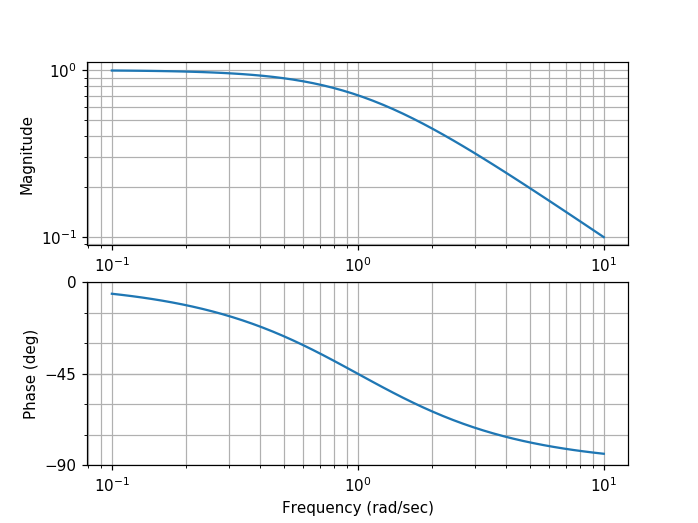

In [28]:
fig = plt.figure()
mag, phase, omega = pc.bode_plot(pt1_w001rad, Hz=False)

In [29]:
omega

array([ 0.1       ,  0.10985411,  0.12067926,  0.13257114,  0.14563485,
        0.15998587,  0.17575106,  0.19306977,  0.21209509,  0.23299518,
        0.25595479,  0.28117687,  0.30888436,  0.33932218,  0.37275937,
        0.40949151,  0.44984327,  0.49417134,  0.54286754,  0.59636233,
        0.65512856,  0.71968567,  0.79060432,  0.86851137,  0.95409548,
        1.04811313,  1.1513954 ,  1.26485522,  1.38949549,  1.52641797,
        1.67683294,  1.84206997,  2.02358965,  2.22299648,  2.44205309,
        2.6826958 ,  2.9470517 ,  3.23745754,  3.55648031,  3.90693994,
        4.29193426,  4.71486636,  5.17947468,  5.68986603,  6.25055193,
        6.86648845,  7.54312006,  8.28642773,  9.10298178, 10.        ])

## PT1 1rad/s discrete 


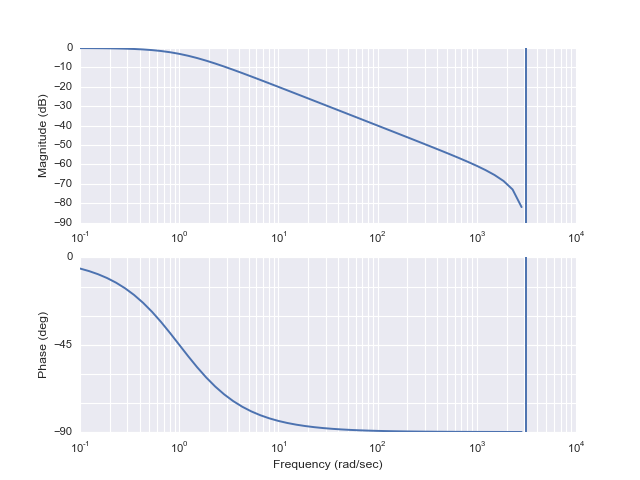

In [19]:
fig = plt.figure()
mag, phase, omega = pc.bode_plot(pt1_w001rads, Hz=False)

In [20]:
omega

array([  1.00000000e-01,   1.23266408e-01,   1.51946075e-01,
         1.87298469e-01,   2.30876096e-01,   2.84592672e-01,
         3.50807165e-01,   4.32427393e-01,   5.33037717e-01,
         6.57056449e-01,   8.09929887e-01,   9.98371483e-01,
         1.23065667e+00,   1.51698628e+00,   1.86993450e+00,
         2.30500110e+00,   2.84129207e+00,   3.50235869e+00,
         4.31723178e+00,   5.32169656e+00,   6.55986422e+00,
         8.08610902e+00,   9.96745618e+00,   1.22865252e+01,
         1.51451584e+01,   1.86688928e+01,   2.30124737e+01,
         2.83666498e+01,   3.49665504e+01,   4.31020109e+01,
         5.31303008e+01,   6.54918136e+01,   8.07294065e+01,
         9.95122400e+01,   1.22665164e+02,   1.51204942e+02,
         1.86384902e+02,   2.29749975e+02,   2.83204542e+02,
         3.49096068e+02,   4.30318185e+02,   5.30437772e+02,
         6.53851591e+02,   8.05979373e+02,   9.93501826e+02,
         1.22465402e+03,   1.50958703e+03,   1.86081371e+03,
         2.29375823e+03,

## PT1 1Hz


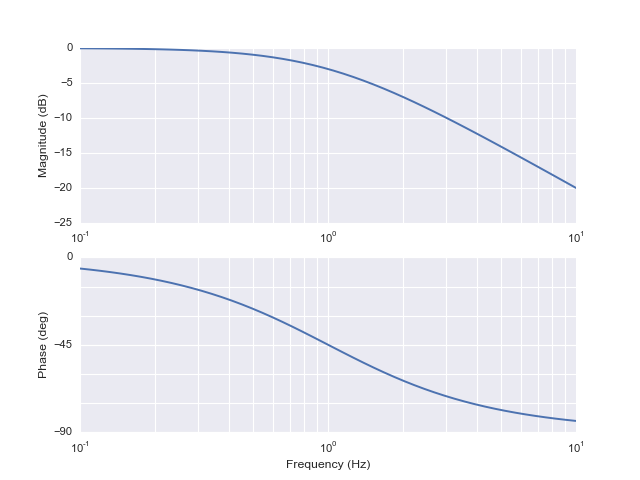

In [21]:
fig = plt.figure()
mag, phase, omega = pc.bode_plot(pt1_w001hz, Hz=True)

In [22]:
omega

array([  0.62831853,   0.69023376,   0.75825018,   0.83296902,
         0.91505074,   1.00522088,   1.10427649,   1.21309316,
         1.33263275,   1.4639519 ,   1.60821139,   1.76668638,
         1.94077767,   2.13202412,   2.34211621,   2.57291102,
         2.82644861,   3.10497008,   3.41093738,   3.74705504,
         4.11629412,   4.52191845,   4.96751345,   5.4570179 ,
         5.99475868,   6.58548904,   7.23443066,   7.94731971,
         8.73045767,   9.59076694,  10.53585207,  11.57406697,
        12.71458874,  13.96749884,  15.34387212,  16.8558748 ,
        18.51687196,  20.34154567,  22.34602481,  24.54802761,
        26.96701828,  29.62437906,  32.5435992 ,  35.75048263,
        39.27337602,  43.14341934,  47.39482115,  52.06516095,
        57.19572137,  62.83185307])

## PT1 1Hz discrete 

<IPython.core.display.Javascript object>


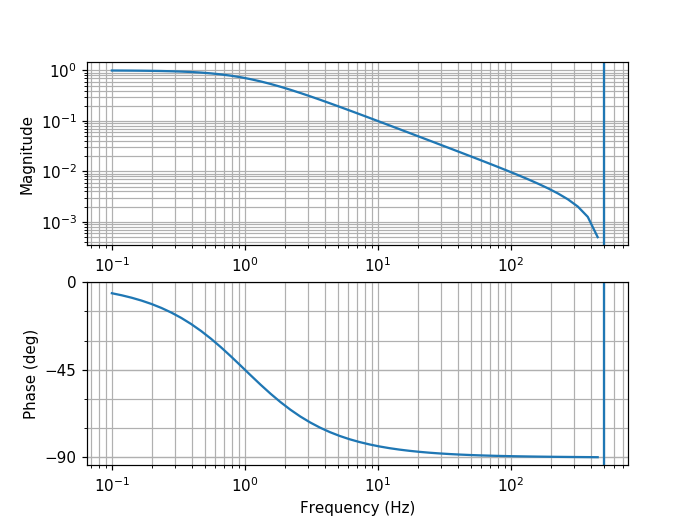

In [30]:
fig = plt.figure()
mag, phase, omega = pc.bode_plot(pt1_w001hzs, Hz=True)

## bode plot with higher resolution

In [31]:
pc.config.bode_number_of_samples = 1000

<IPython.core.display.Javascript object>


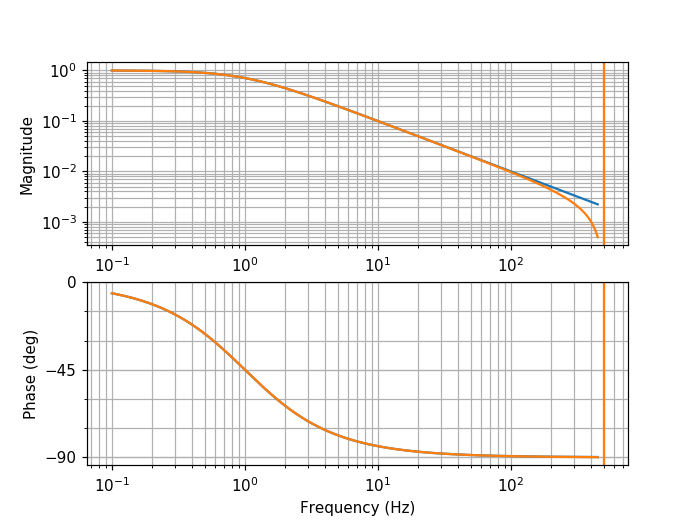

In [32]:
fig = plt.figure()
mag, phase, omega = pc.bode_plot([pt1_w001hz, pt1_w001hzs], Hz=True)

## PT1 with additional integrator, continious and descrete

<IPython.core.display.Javascript object>


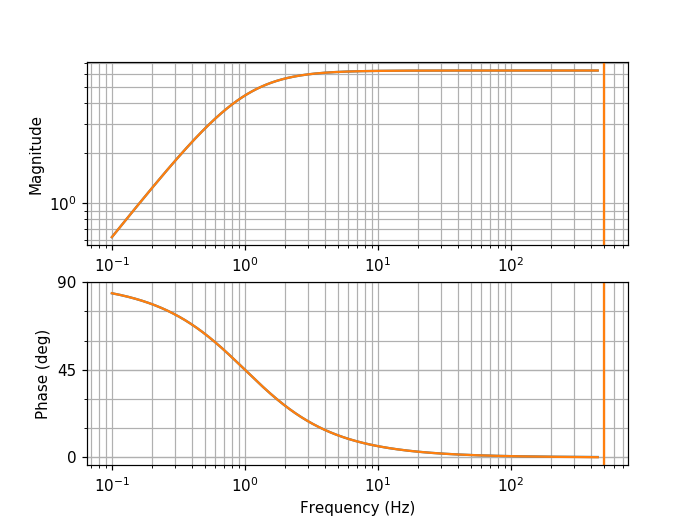

In [33]:
fig = plt.figure()
mag, phase, omega = pc.bode_plot([pt1_w001hzi, pt1_w001hzis], Hz=True)

## combination of various systems

<IPython.core.display.Javascript object>


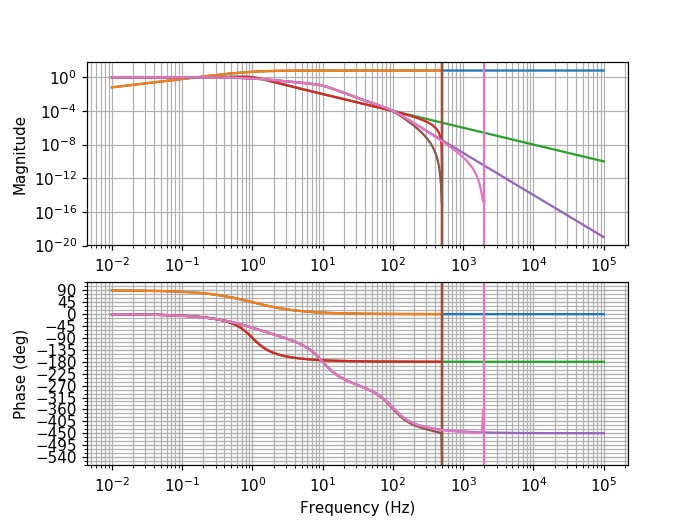

In [34]:
pc.config.bode_feature_periphery_decade  = 1.
pc.config.bode_number_of_samples  = 10000
fig = plt.figure()
mag, phase, omega = pc.bode_plot([pt1_w001hzi, pt1_w001hzis, pt2_w001hz, pt2_w001hzs, pt5hz, pt5s, pt5sh], Hz=True)

## broader bode plot

In [35]:
pc.config.bode_feature_periphery_decade  = 3.5

<IPython.core.display.Javascript object>


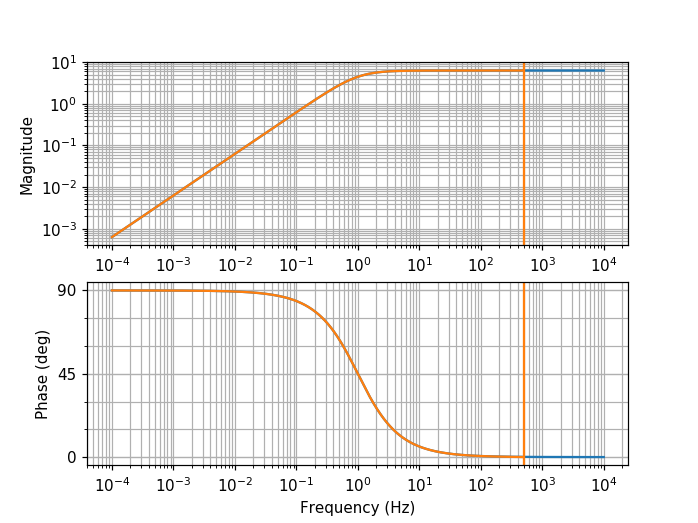

In [36]:
fig = plt.figure()
mag, phase, omega = pc.bode_plot([pt1_w001hzi, pt1_w001hzis], Hz=True)

## phase in rad

<IPython.core.display.Javascript object>


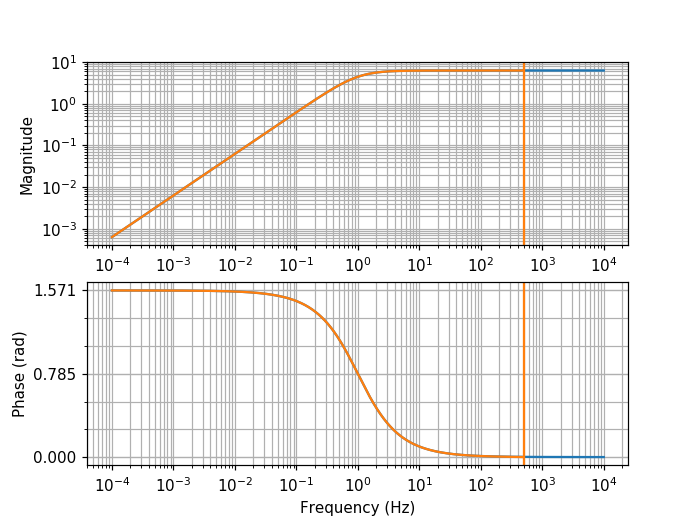

In [37]:
fig = plt.figure()
mag, phase, omega = pc.bode_plot([pt1_w001hzi, pt1_w001hzis], Hz=True, deg=False)

# test omega_limits

<IPython.core.display.Javascript object>


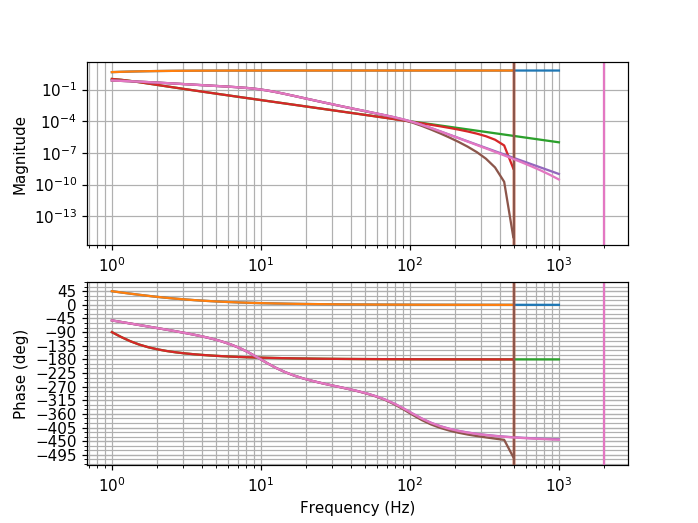

In [38]:
pc.config.bode_feature_periphery_decade  = 1.
pc.config.bode_number_of_samples  = 1000
fig = plt.figure()
mag, phase, omega = pc.bode_plot([pt1_w001hzi, pt1_w001hzis, pt2_w001hz, pt2_w001hzs, pt5hz, pt5s, pt5sh], Hz=True,
                                 omega_limits=(1.,1000.))

<IPython.core.display.Javascript object>


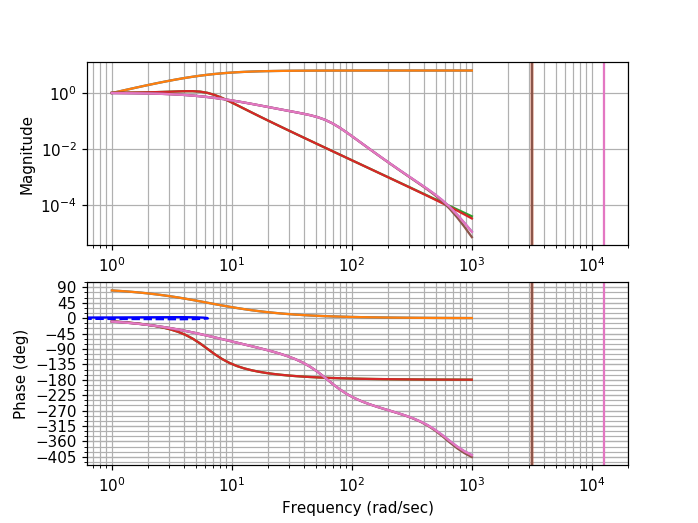

In [39]:
fig = plt.figure()
mag, phase, omega = pc.bode_plot([pt1_w001hzi, pt1_w001hzis, pt2_w001hz, pt2_w001hzs, pt5hz, pt5s, pt5sh], Hz=False,
                                 omega_limits=(1.,1000.))

<IPython.core.display.Javascript object>


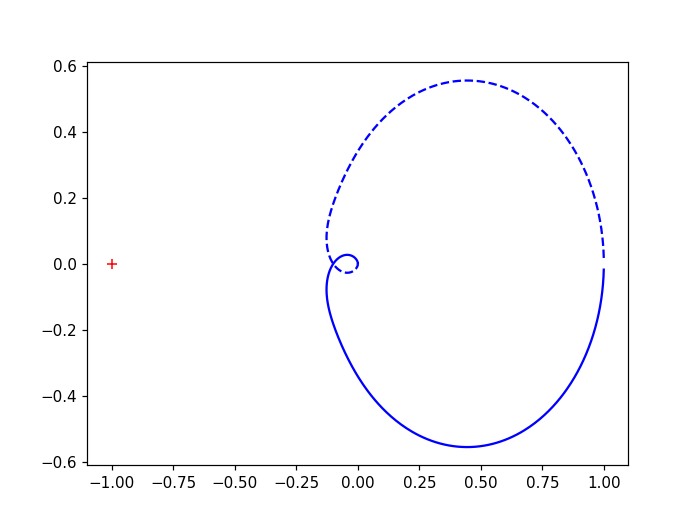

hello


In [50]:
fig = plt.figure()
mag, phase, omega = pc.nyquist_plot([pt5hz, pt5s, pt5sh])